## Install hail

In [ ]:
%%bash
# install hail in a conda env.
conda create -n hail python'>=3.6,<3.8'
conda activate hail
pip install hail


In [ ]:
# let's also install rpy2 for R
conda install -c r rpy2

## Setup

In [233]:
import hail as hl
hl.init(default_reference='GRCh37')

from hail.plot import show, output_notebook
from pprint import pprint
hl.plot.output_notebook()

2020-05-19 15:20:56 Hail: WARN: This Hail JAR was compiled for Spark 2.4.0, running with Spark 2.4.1.
  Compatibility is not guaranteed.
2020-05-19 15:20:56 Hail: INFO: SparkUI: http://da02:4040
Running on Apache Spark version 2.4.1
SparkUI available at http://da02:4040
Welcome to
     __  __     <>__
    / /_/ /__  __/ /
   / __  / _ `/ / /
  /_/ /_/\_,_/_/_/   version 0.2.39-ef87446bd1c7
LOGGING: writing to /PHShome/bm363/hail-20200519-1520-0.2.39-ef87446bd1c7.log


Loading BokehJS ...

In [234]:
# let's change the working directory to where the final vcf files are saved
import os
os.chdir("/data/humgen/guffantilab/exome/SystemsBio/gatk_merged_vcf")

In [2]:
# for running some R codes as well
%load_ext rpy2.ipython

In [10]:
%%R
library(tidyverse)

/PHShome/bm363/.conda/envs/hail/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

  warnings.warn(x, RRuntimeWarning)
/PHShome/bm363/.conda/envs/hail/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ✔ ggplot2 3.2.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0

  warnings.warn(x, RRuntimeWarning)
/PHShome/bm363/.conda/envs/hail/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

  warnings.warn(x, RRuntimeWarning)


## Load data

In [ ]:
# convert the vcf file to Hail MatrixTable format
# (the following line is run run only once)

hl.import_vcf('/data/humgen/guffantilab/exome/SystemsBio/gatk_merged_vcf/SysBio_indels_recalibrated_b37.vcf',reference_genome='GRCh37').write('/data/humgen/guffantilab/exome/SystemsBio/gatk_merged_vcf/SysBio_indels_recalibrated_b37.mt', overwrite=True)

2020-05-20 00:45:23 Hail: INFO: Coerced sorted dataset


Let's load the VCF data and convert it to Hail MatrixTable format (Hail's native file format for faster processing).

In [343]:

# now let's read this file
mt = hl.read_matrix_table('/data/humgen/guffantilab/exome/SystemsBio/gatk_merged_vcf/SysBio_indels_recalibrated_b37.mt')

## Exploring variants

In [344]:
mt.describe(widget=True)

In [345]:
mt.info.show()

locus,alleles,info.AC,info.AF,info.AN,info.BaseQRankSum,info.ClippingRankSum,info.DB,info.DP,info.DS,info.END,info.ExcessHet,info.FS,info.HaplotypeScore,info.InbreedingCoeff,info.MLEAC,info.MLEAF,info.MQ,info.MQRankSum,info.NEGATIVE_TRAIN_SITE,info.POSITIVE_TRAIN_SITE,info.QD,info.RAW_MQ,info.ReadPosRankSum,info.ReverseComplementedAlleles,info.SOR,info.SwappedAlleles,info.VQSLOD,info.culprit
locus<GRCh37>,array<str>,array<int32>,array<float64>,int32,float64,float64,bool,int32,bool,int32,float64,float64,float64,float64,array<int32>,array<float64>,float64,float64,bool,bool,float64,float64,float64,bool,float64,bool,float64,str
1:12882,"[""C"",""G""]",[3],[6.79e-03],442,3.49e-01,0.00e+00,false,1013,false,NA,3.22e+00,0.00e+00,NA,-7.56e-02,[3],[6.79e-03],2.40e+01,-1.11e-01,true,false,1.31e+00,NA,1.26e-01,false,1.24e-01,false,-5.94e+00,"""MQRankSum"""
1:12981,"[""G"",""C""]",[2],[4.31e-03],464,-2.00e+00,0.00e+00,false,6880,false,NA,3.04e+00,0.00e+00,NA,-5.60e-03,[2],[4.31e-03],2.34e+01,2.91e-01,true,false,1.90e+00,NA,9.56e-01,false,7.70e-02,false,-5.96e+00,"""MQRankSum"""
1:13012,"[""G"",""A""]",[12],[2.60e-02],464,-1.83e+00,0.00e+00,false,7867,false,NA,3.76e+00,2.93e+00,NA,-2.78e-02,[8],[1.70e-02],2.42e+01,-3.67e-01,true,false,4.40e-01,NA,-8.45e-01,false,4.54e-01,false,-3.12e+00,"""MQRankSum"""
1:13110,"[""G"",""A""]",[22],[5.40e-02],404,-7.93e-01,0.00e+00,false,4217,false,NA,1.15e+01,5.18e+00,NA,-9.61e-02,[24],[5.90e-02],2.67e+01,-1.21e+00,true,false,1.98e+00,NA,-1.22e+00,false,1.37e+00,false,-3.98e+00,"""MQRankSum"""
1:13116,"[""T"",""G""]",[35],[8.50e-02],414,5.24e-01,0.00e+00,false,3207,false,NA,7.64e+00,1.07e+02,NA,-6.40e-02,[55],[1.33e-01],2.64e+01,-1.97e+00,false,false,1.22e+01,NA,-1.62e+00,false,7.45e+00,false,-2.00e+02,"""FS"""
1:13118,"[""A"",""G""]",[33],[8.00e-02],414,-1.47e+00,0.00e+00,false,2960,false,NA,5.04e+00,8.96e+01,NA,-2.57e-02,[47],[1.14e-01],2.68e+01,-2.15e+00,false,false,1.38e+01,NA,-1.99e+00,false,7.23e+00,false,-1.43e+02,"""FS"""
1:13127,"[""G"",""A""]",[1],[2.44e-03],410,-3.37e+00,0.00e+00,false,2276,false,NA,3.01e+00,0.00e+00,NA,-2.74e-02,[1],[2.44e-03],2.88e+01,1.27e+00,true,false,5.70e+00,NA,2.80e-01,false,6.48e-01,false,-5.86e+00,"""MQRankSum"""
1:13178,"[""G"",""A""]",[6],[1.30e-02],456,-3.06e+00,0.00e+00,false,4387,false,NA,3.21e+00,4.73e+01,NA,-1.22e-02,[6],[1.30e-02],3.31e+01,-2.54e-01,false,false,4.82e+00,NA,4.25e-01,false,5.33e+00,false,-4.15e+01,"""FS"""
1:13187,"[""G"",""A""]",[1],[2.17e-03],462,-3.47e+00,0.00e+00,false,5168,false,NA,3.02e+00,5.85e+00,NA,1.10e-03,[1],[2.17e-03],2.33e+01,-2.70e-01,true,false,5.16e+00,NA,8.70e-02,false,2.76e+00,false,-4.08e+00,"""MQRankSum"""


In [346]:
mt.GT.show()

locus,alleles,201035_S6.GT,201048_S2.GT,201054_S8.GT,201062_S4.GT,201062_S5.GT,201080_S8.GT,201086_S9.GT,201087_S6.GT,201100_S3.GT,201100_S4.GT,201105_S6.GT,201108_S7.GT,201109_S1.GT
locus<GRCh37>,array<str>,call,call,call,call,call,call,call,call,call,call,call,call,call
1:12882,"[""C"",""G""]",0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
1:12981,"[""G"",""C""]",0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
1:13012,"[""G"",""A""]",0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
1:13110,"[""G"",""A""]",0/0,NA,0/0,0/1,0/0,0/0,0/0,NA,0/0,0/0,0/0,0/0,0/0
1:13116,"[""T"",""G""]",0/0,NA,0/0,0/0,0/1,0/0,0/0,NA,0/0,0/0,0/0,0/0,0/1
1:13118,"[""A"",""G""]",0/0,NA,0/0,0/0,0/1,0/0,0/0,NA,0/0,0/0,0/0,0/0,0/1
1:13127,"[""G"",""A""]",0/0,NA,0/0,0/0,0/0,NA,0/0,0/0,0/0,0/0,0/0,0/0,0/0
1:13178,"[""G"",""A""]",0/0,NA,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
1:13187,"[""G"",""A""]",0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0


In [347]:
mt.DP.summarize()

Non-missing,996703090 (100.00%)
Missing,42222 (0.00%)
Minimum,0
Maximum,4479
Mean,5.85
Std Dev,17.63


In [349]:
mt.AD.summarize()

Non-missing,996745312 (100.00%)
Missing,0
Min Size,2
Max Size,7
Mean Size,2.02
Non-missing,2012880720 (100.00%)
Missing,0
Minimum,0
Maximum,3919
Mean,2.89
Std Dev,11.96


In [348]:
# number of variants and samples
mt.count()

(4296316, 232)

In [350]:
hl.summarize_variants(mt)

Number of alleles,Count
2,4229977
3,55636
4,6643
5,2295
6,1054
7,711
Allele type,Count
SNP,3716544
Deletion,411483
Insertion,226149


In [351]:
mt.aggregate_rows(hl.array(hl.agg.counter(mt.alleles)))

[(['A', 'AAAAAAAAAAAAAAC'], 1),
 (['A', 'AAAAAAAAAAAAAAG'], 1),
 (['A', 'AAAAAAAAAAAAAAT'], 1),
 (['A', 'AAAAAAAAAAAAAC'], 2),
 (['A', 'AAAAAAAAAAAAACC'], 1),
 (['A', 'AAAAAAAAAAAAATTG'], 1),
 (['A', 'AAAAAAAAAAAAG'], 2),
 (['A', 'AAAAAAAAAAAC'], 1),
 (['A', 'AAAAAAAAAAAG'], 3),
 (['A', 'AAAAAAAAAAATT', 'AAAAAAAAAAATTTTTT'], 1),
 (['A', 'AAAAAAAAAAC'], 2),
 (['A', 'AAAAAAAAAACAAAGCAAAAC'], 1),
 (['A', 'AAAAAAAAAAG'], 4),
 (['A', 'AAAAAAAAAAGAAAAG'], 1),
 (['A', 'AAAAAAAAAAGCC'], 1),
 (['A', 'AAAAAAAAAC'], 4),
 (['A', 'AAAAAAAAAG'], 1),
 (['A', 'AAAAAAAAAG', 'G', 'AG'], 1),
 (['A', 'AAAAAAAAAGGAAAAG'], 1),
 (['A', 'AAAAAAAAAGGGGGGT'], 1),
 (['A', 'AAAAAAAAATAATAATAAT'], 1),
 (['A', 'AAAAAAAAC'], 3),
 (['A', 'AAAAAAAAC', 'AAAAAAAC', 'AAAAAAC'], 1),
 (['A', 'AAAAAAAACAAAAAAAAAAC'], 1),
 (['A', 'AAAAAAAACCAC'], 1),
 (['A', 'AAAAAAAACGTT'], 1),
 (['A', 'AAAAAAAAG'], 7),
 (['A', 'AAAAAAAAG', 'AAAAAAAG'], 1),
 (['A', 'AAAAAAAAGAAAAAG'], 1),
 (['A', 'AAAAAAAAT'], 1),
 (['A', 'AAAAAAAATATCAGTTA

In [352]:
# let's just focus on SNV
snv_counts = mt.aggregate_rows(
    hl.array(
        hl.agg.filter(
            hl.is_snp(mt.alleles[0],mt.alleles[1]),
            hl.agg.counter(mt.alleles))))
sorted(snv_counts,
      key=lambda x: -x[1])

[(['G', 'A'], 698690),
 (['C', 'T'], 694984),
 (['T', 'C'], 541184),
 (['A', 'G'], 541106),
 (['C', 'A'], 167603),
 (['G', 'T'], 167141),
 (['C', 'G'], 166337),
 (['G', 'C'], 166062),
 (['A', 'C'], 141169),
 (['T', 'G'], 139296),
 (['T', 'A'], 124300),
 (['A', 'T'], 123184),
 (['G', 'A', '*'], 2090),
 (['C', 'T', '*'], 1897),
 (['T', 'C', '*'], 1886),
 (['A', 'C', '*'], 1829),
 (['A', 'G', '*'], 1748),
 (['G', 'C', '*'], 1340),
 (['A', 'T', '*'], 1270),
 (['T', 'A', '*'], 1227),
 (['C', 'A', '*'], 1107),
 (['G', 'T', '*'], 1038),
 (['T', 'G', '*'], 1001),
 (['C', 'G', '*'], 640),
 (['G', 'C', 'A'], 528),
 (['C', 'G', 'T'], 505),
 (['C', 'T', 'A'], 497),
 (['G', 'T', 'A'], 478),
 (['C', 'A', 'T'], 477),
 (['C', 'T', 'G'], 473),
 (['G', 'A', 'T'], 470),
 (['G', 'A', 'C'], 465),
 (['T', 'G', 'C'], 417),
 (['T', 'C', 'G'], 403),
 (['A', 'C', 'G'], 379),
 (['C', 'G', 'A'], 375),
 (['T', 'G', 'A'], 359),
 (['A', 'G', 'C'], 336),
 (['G', 'C', 'T'], 336),
 (['T', 'C', 'A'], 304),
 (['A', 'G', 

## Load pheno data

In [353]:
# let's import pheno data and incorporate it with the MatrixTable data
pheno1 = hl.import_table('/data/humgen/guffantilab/exome/SystemsBio/gatk_merged_vcf/SB_pheno1.txt',
                        impute=True,
                        key='sid')

2020-05-20 09:19:28 Hail: INFO: Reading table to impute column types
2020-05-20 09:19:28 Hail: INFO: Loading 177 fields. Counts by type:
  92 fields: imputed int32
  45 fields: imputed float64
  31 fields: imputed str
  9 fields: str (no non-missing values for imputation)


In [354]:
pheno1.show()

ID,sid,CAPSB_LT,CAPSC_LT,CAPSD_LT,CAPS_2clusters_LT,CAPS_3clusters_LT,CAPSB_cur,CAPSC_cur,CAPSD_cur,CAPSTOT_cur,CAPS_2clusters_cur,CAPS_3clusters_cur,PTSD_status,sumETI_Gen_Trauma,sumETI_Phy_Abuse,sumETI_Emo_abuse,sumETI_Sex_Abuse,ETISR_Total,MCS,mcslite,BDI_total,BDI_cut18,PCLB,PCLC,PCLD,PCLCLUST,PCLSCORE,PCLDIAG,sclsom,SCLOC,SCLINT,SCLDEP,SCLANX,SCLHOS,SCLPHOB,SCLPAR,SCLPSY,SCLGSI,SCLPST,SCLPSDI,PTSD_duration,PDEQRV,PDEQEV,AUDIT,pdirv,pdiev,SASSR,SASWKSCH,SASSOCLS,SASEXFAM,SASMAR,SASPARNT,SASFAMUN,PSS,PANAS_PA,PANAS_NA,PSQI,meanERS,sumERS,STAXI1,ASI,AGG_PHYS,AGG_MENT,PF_T,RP_T,BP_T,GH_T,VT_T,RE_T,SF_T,MH_T,LES6pos,LES6neg,LES12pos,LES12neg,LES12TOT,LES6TOT,DRRI_D_score,DRRI_E_score,DRRI_J_score,DRRI_K2_score,DRRI_L_score,DRRI_M_score,sos,CAPSTOT_LT,STAXI2,emotional_abuse_score,physical_abuse_score,sexual_abuse_score,emontional_neglect_score,physical_neglect_score,DES_score,HIT6_score,PTCI_score,TimeP.x,Date.x,DemoAge,DemoGend,DemoOccupation,DemoEdu,DemoEth,DemoEth_Hispanic,DemoEth_Not_Hisp,DemoEth_Asian,DemoEth_Black,DemoEth_White,DemoEth_NativeAm,DemoEth_Other,DemoRel,DemoRel_Married,DemoRel_Living,DemoRel_SteadyRel,DemoRel_Divorced,DemoRel_Widow,DemoRel_Single,DemoChi,DemoChi2,DemoChi3,DemoMilBranch,Army,Navy,AirForce,Marine,NatGuard,Reserve,DemoMilServiceTours,DemoMilService_Iraq,DemoMilServiceIraqFrom_1,DemoMilServiceIraqTo_1,DemoMilServiceIraqMOS_1,DemoMilServiceIraqFrom_2,DemoMilServiceIraqTo_2,DemoMilServiceIraqMOS_2,DemoMilServiceIraqFrom_3,DemoMilServiceIraqTo_3,DemoMilServiceIraqMOS_3,DemoMilService_Afgh,DemoMilServiceAfghFrom_1,DemoMilServiceAfghTo_1,DemoMilServiceAfghMOS_1,DemoMilServiceAfghFrom_2,DemoMilServiceAfghTo_2,DemoMilServiceAfghMOS_2,DemoMilServiceAfghFrom_3,DemoMilServiceAfghTo_3,DemoMilServiceAfghMOS_3,DemoMilService_Other,DemoMilServiceOtherTours,DemoLocationOtherSpecify,DemoMilServiceOtherFrom_1,DemoMilServiceOtherTo_1,DemoMilServiceOtherMOS_1,DemoMilServiceOtherFrom_2,DemoMilServiceOtherTo_2,DemoMilServiceOtherMOS_2,DemoMilServiceOtherFrom_3,DemoMilServiceOtherTo_3,DemoMilServiceOtherMOS_3,DemoMilServiceLocation_Iraq,DemoMilServiceIraqTours,DemoMilServiceLocation_Afgh,DemoMilServiceAfghanistanTours,DemoMilServiceLocation_Other,Eth_race,TimeP.y,Date.y,Body_Weight,BMI,Standing_Height,Waist_Circumference,Hip_Circumference,Waist_to_Hip_Ratio,Systolic_Blood_Pressure,Diastolic_Blood_Pressure,Pulse,ABM3C
int32,str,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,str,int32,int32,int32,int32,int32,int32,float64,int32,int32,int32,int32,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,float64,float64,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,float64,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,str,int32,int32,str,int32,str,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,str,int32,int32,int32,int32,int32,int32,int32,int32,str,str,str,str,str,str,str,str,str,int32,str,str,str,str,str,str,str,str,str,int32,int32,str,str,str,str,str,str,str,str,str,str,str,int32,str,str,str,str,int32,str,float64,float64,int32,float64,float64,float64,int32,int32,int32,float64
201008,"""201008_S4""",2,10,7,0,0,0,0,0,0,0,0,"""Negative""",0,1,0,0,1,66,6.08e+01,2,0,1,0,0,1,28,0,8.30e-02,1.00e-01,6.67e-01,3.08e-01,2.00e-01,8.33e-01,2.86e-01,3.33e-01,3.00e-01,3.22e-01,20,1.45e+00,4.00e+00,1.20e+00,2.10e+00,3,1.92e+00,2.46e+00,1.77e+00,1.60e+00,2.22e+00,1.38e+00,1.89e+00,NA,1.50e+00,1.70e+00,40,15,6.00e+00,3.30e+00,33,15,7.00e+00,5.51e+01,5.72e+01,5.65e+01,5.72e+01,5.74e+01,5.12e+01,5.78e+01,5.61e+01,5.66e+01,5.84e+01,3,0,11,3,14,3,24,32,57,0,37,3,4.50e+00,19,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,"""20-Apr-11""",29,1,"""US ARMY""",4,NA,0,NA,

In [355]:
# now incorporate it to the genotype data
mt = mt.annotate_cols(pheno = pheno1[mt.s])

In [366]:
mt.describe(widget=True)

In [356]:
mt.aggregate_cols(hl.agg.counter(mt.pheno.PTSD_status))


{'Negative': 117, 'Positive': 112, None: 3}

## Sample QC

In [357]:
mt = hl.sample_qc(mt)

In [362]:
p = hl.plot.scatter(x=mt.sample_qc.dp_stats.mean,
                    y=mt.sample_qc.call_rate,
                    xlabel='Mean DP',
                    ylabel='Call Rate',
                    hover_fields={'ID': mt.s},
                    size=8)
show(p)

In [364]:
mt.filter_cols(mt.sample_qc.call_rate >= 0.27).count_cols()

163

## Variant QC

In [365]:
mt = hl.variant_qc(mt)

In [367]:
mt.variant_qc.show()

locus,alleles,variant_qc.dp_stats.mean,variant_qc.dp_stats.stdev,variant_qc.dp_stats.min,variant_qc.dp_stats.max,variant_qc.gq_stats.mean,variant_qc.gq_stats.stdev,variant_qc.gq_stats.min,variant_qc.gq_stats.max,variant_qc.AC,variant_qc.AF,variant_qc.AN,variant_qc.homozygote_count,variant_qc.call_rate,variant_qc.n_called,variant_qc.n_not_called,variant_qc.n_filtered,variant_qc.n_het,variant_qc.n_non_ref,variant_qc.het_freq_hwe,variant_qc.p_value_hwe
locus<GRCh37>,array<str>,float64,float64,float64,float64,float64,float64,float64,float64,array<int32>,array<float64>,int32,array<int32>,float64,int64,int64,int64,int64,int64,float64,float64
1:12882,"[""C"",""G""]",4.37e+00,3.11e+00,0.00e+00,1.60e+01,1.25e+01,9.36e+00,0.00e+00,5.50e+01,"[439,3]","[9.93e-01,6.79e-03]",442,"[218,0]",9.53e-01,221,11,0,3,3,1.35e-02,5.03e-01
1:12981,"[""G"",""C""]",2.97e+01,8.17e+00,5.00e+00,5.70e+01,7.89e+01,2.21e+01,0.00e+00,9.90e+01,"[462,2]","[9.96e-01,4.31e-03]",464,"[230,0]",1.00e+00,232,0,0,2,2,8.60e-03,5.01e-01
1:13012,"[""G"",""A""]",3.39e+01,9.25e+00,4.00e+00,6.40e+01,7.94e+01,2.55e+01,0.00e+00,9.90e+01,"[452,12]","[9.74e-01,2.59e-02]",464,"[220,0]",1.00e+00,232,0,0,12,12,5.05e-02,5.68e-01
1:13110,"[""G"",""A""]",1.82e+01,1.11e+01,0.00e+00,5.00e+01,3.55e+01,2.63e+01,0.00e+00,9.90e+01,"[382,22]","[9.46e-01,5.45e-02]",404,"[180,0]",8.71e-01,202,30,0,22,22,1.03e-01,7.27e-01
1:13116,"[""T"",""G""]",1.38e+01,1.06e+01,0.00e+00,6.20e+01,2.14e+01,3.00e+01,0.00e+00,9.90e+01,"[379,35]","[9.15e-01,8.45e-02]",414,"[179,7]",8.92e-01,207,25,0,21,28,1.55e-01,5.62e-05
1:13118,"[""A"",""G""]",1.28e+01,1.01e+01,0.00e+00,5.40e+01,2.38e+01,3.01e+01,0.00e+00,9.90e+01,"[381,33]","[9.20e-01,7.97e-02]",414,"[181,7]",8.92e-01,207,25,0,19,26,1.47e-01,2.14e-05
1:13127,"[""G"",""A""]",9.81e+00,8.92e+00,0.00e+00,4.20e+01,2.45e+01,2.05e+01,3.00e+00,9.90e+01,"[409,1]","[9.98e-01,2.44e-03]",410,"[204,0]",8.84e-01,205,27,0,1,1,4.88e-03,5.00e-01
1:13178,"[""G"",""A""]",1.89e+01,1.39e+01,0.00e+00,1.13e+02,5.09e+01,3.17e+01,0.00e+00,9.90e+01,"[450,6]","[9.87e-01,1.32e-02]",456,"[222,0]",9.83e-01,228,4,0,6,6,2.60e-02,5.16e-01
1:13187,"[""G"",""A""]",2.23e+01,1.43e+01,0.00e+00,1.18e+02,6.08e+01,3.32e+01,0.00e+00,9.90e+01,"[461,1]","[9.98e-01,2.16e-03]",462,"[230,0]",9.96e-01,231,1,0,1,1,4.33e-03,5.00e-01


In [369]:
show(hl.plot.cdf(mt.variant_qc.dp_stats.mean))

In [371]:
show(hl.plot.cdf(mt.variant_qc.p_value_hwe))

Number of variants per chromosome

In [38]:
%%bash --out variants_chrom
cd /data/humgen/guffantilab/exome/SystemsBio/gatk_merged_vcf
grep -v '#' SysBio_indels_recalibrated.vcf | cut -f1 | uniq -c

In [228]:
#print(variants_chrom)
import pandas as pd
import numpy as np
from io import StringIO
tmp = StringIO(variants_chrom)
variants_chrom2 = pd.read_csv(tmp, sep="\s+", header=None)
x2 = np.matrix(variants_chrom2).transpose()

print(x2)


[[374795 340467 293649 240282 226359 251100 246918 210933 180086 218911
  211578 209331 121438 128020 149788 152567 166795 99985 153965 101541
  61843 78862 75799 1304]
 ['chr1' 'chr2' 'chr3' 'chr4' 'chr5' 'chr6' 'chr7' 'chr8' 'chr9' 'chr10'
  'chr11' 'chr12' 'chr13' 'chr14' 'chr15' 'chr16' 'chr17' 'chr18' 'chr19'
  'chr20' 'chr21' 'chr22' 'chrX' 'chrY']]


([<matplotlib.axis.XTick at 0x7ff3ddf71450>,
 [Text(0, 0, 'chr1'),
  Text(0, 0, 'chr2'),
  Text(0, 0, 'chr3'),
  Text(0, 0, 'chr4'),
  Text(0, 0, 'chr5'),
  Text(0, 0, 'chr6'),
  Text(0, 0, 'chr7'),
  Text(0, 0, 'chr8'),
  Text(0, 0, 'chr9'),
  Text(0, 0, 'chr10'),
  Text(0, 0, 'chr11'),
  Text(0, 0, 'chr12'),
  Text(0, 0, 'chr13'),
  Text(0, 0, 'chr14'),
  Text(0, 0, 'chr15'),
  Text(0, 0, 'chr16'),
  Text(0, 0, 'chr17'),
  Text(0, 0, 'chr18'),
  Text(0, 0, 'chr19'),
  Text(0, 0, 'chr20'),
  Text(0, 0, 'chr21'),
  Text(0, 0, 'chr22'),
  Text(0, 0, 'chrX'),
  Text(0, 0, 'chrY')])

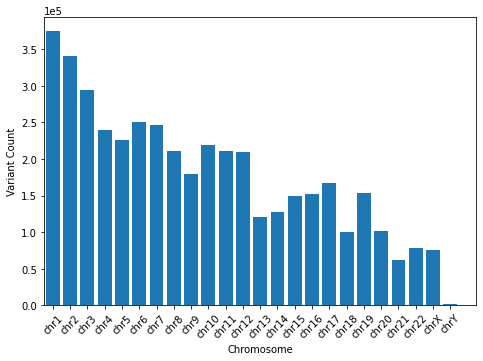

In [230]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
ax1.bar(np.arange(24), np.squeeze(np.asarray(x2[0])))
ax1.set_ylabel('Variant Count')
ax1.set_xlabel('Chromosome')
ax1.set_xlim(-0.5,24.5)
ax1.ticklabel_format(style='sci', scilimits=(0,0), axis='y')
plt.xticks(np.arange(24),np.squeeze(np.asarray(x2[1])),rotation=45)


In [200]:
%%R -i x2

x2 %>%
    as_tibble() %>%
    print()

[[374795 340467 293649 240282 226359 251100 246918 210933 180086 218911
  211578 209331 121438 128020 149788 152567 166795 99985 153965 101541
  61843 78862 75799 1304]
 ['chr1' 'chr2' 'chr3' 'chr4' 'chr5' 'chr6' 'chr7' 'chr8' 'chr9' 'chr10'
  'chr11' 'chr12' 'chr13' 'chr14' 'chr15' 'chr16' 'chr17' 'chr18' 'chr19'
  'chr20' 'chr21' 'chr22' 'chrX' 'chrY']]


In [32]:
mt.entry.take(1)

[Struct(AD=[6, 0], DP=6, GQ=18, GT=Call(alleles=[0, 0], phased=False), MIN_DP=None, PGT=None, PID=None, PL=[0, 18, 210], RGQ=None, SB=None)]

In [373]:
p = hl.plot.histogram(mt.DP, range=(0,50), bins=30, title='DP Histogram', legend='DP')
show(p)

In [382]:
p = hl.plot.histogram(mt.GQ, range=(0,100), bins=30, title='GQ Histogram', legend='GQ')
show(p)

In [375]:
p = hl.plot.histogram(mt.qual, range=(0,1000), bins=30, title='QUAL Histogram', legend='QUAL')
show(p)

In [381]:
p = hl.plot.histogram(mt.PL[0], range=(0,10), bins=10, title='PL1 Histogram', legend='PL')
show(p)